In [ ]:
# ME 592 - HW1 - Juan S Panelo

In [ ]:
# 2.1. Download the MNIST dataset using the torchvision library and create a subset
# of the dataset containing 1,000 samples. Each sample will include a 28 × 28 pixel
# image, along with a single integer value denoting the sample’s respective class (number).

In [42]:
from torchvision import datasets

#Import dataset#
mnist = datasets.MNIST('./data', train=True, download=False)

#Load data#
mnist = mnist._load_data()

(images, labels) = mnist
print(images.shape, labels.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


In [113]:
# Subsample 1000 random images from the MNIST
sub_set = np.random.choice(images.shape[0], 1000, replace=False)
subset_x_img = images[sub_set]
subset_y_lab = labels[sub_set]

In [ ]:
# 2.2. Plot a histogram of classes in your subset of MNIST.

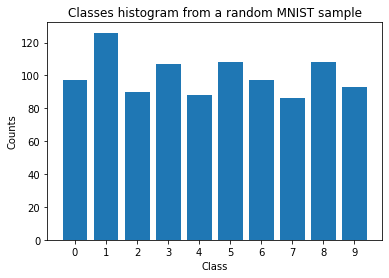

In [57]:
unique, counts = np.unique(subset_y_lab, return_counts=True)

plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel("Class")
plt.ylabel("Counts")


plt.title("Classes histogram from a random MNIST sample")

plt.show()

In [ ]:
# 2.3. Use the einops python package to ’batch’ the subset of MNIST images. Each
# batch should contain 25 different samples

In [59]:
from einops import rearrange, repeat

batch = rearrange(subset_x_img, '(b1 b2 b3) w h -> b1 b2 b3 w h', b1=40, b2=25)
batch.shape

torch.Size([40, 25, 1, 28, 28])

In [ ]:
# 2.4. Randomly select an MNIST image sample and, using matplotlib, plot it in three
# dimensions. The x and y-axis’ should be the respective pixel locations, and the
# z-axis should be the pixel intensity.

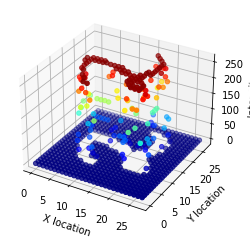

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#from mpl_toolkits import mplot3d

#Select a random image
rand = np.random.randint(4, len(subset_x_img))
img = mnist_x_sub[rand]

#Plot it out#
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
x, y = np.meshgrid(range(img.shape[0]), range(img.shape[1]), indexing='ij')
ax.scatter(x, y, img, c=img, cmap='jet')

ax.set_xlabel('X location')
ax.set_ylabel('Y location')
ax.set_zlabel('Intensity')

plt.show()

In [ ]:
# 2.2. Time series

In [ ]:
# 2.2.1. Plot the appliances energy consumption for whole period and a closer look at any
# one week of consumption.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv'

energy_data = pd.read_csv(url)
dates = pd.to_datetime(energy_data['date'])
energy_data.loc[:,'DATE'] = dates

energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,DATE
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00


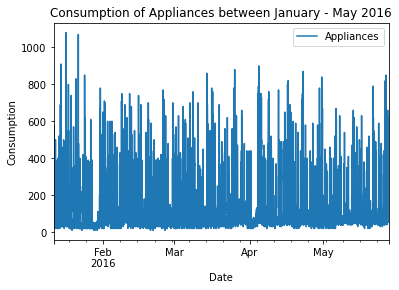

In [4]:
# Whole period consumption due to appliances

energy_data.plot(x = 'DATE', y = 'Appliances')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Consumption of Appliances between January - May 2016')

plt.show()

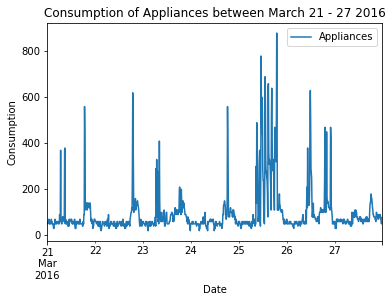

In [5]:
# A-Week lookup

start_date = '2016-03-21 00:00:00'
end_date = '2016-03-27 23:51:00'

mask = (energy_data["date"] >= start_date) & (energy_data["date"] <= end_date)         # create a mask of true/false to filter elements in the orginal data frame
week = energy_data[mask]                                                                                                                   # filter from the df only the elements required on the 'mask'

week.plot(x = "DATE", y = "Appliances")
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Consumption of Appliances between March 21 - 27 2016')

plt.show()

In [ ]:
#2.2.2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1.

In [6]:
import numpy as np

# Extract the day and hour from the datetime column
week['day'] = week['DATE'].dt.strftime('%Y-%m-%d')
week['hour'] = week['DATE'].dt.hour

# Group the dataframe by day and hour and summarize the data column
week_gp = week.groupby(['day', 'hour'])['Appliances'].sum().reset_index()
pivot = week_gp.pivot(index='hour', columns='day', values='Appliances')

/tmp/ipykernel_70666/3816187512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week['day'] = week['DATE'].dt.strftime('%Y-%m-%d')
/tmp/ipykernel_70666/3816187512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week['hour'] = week['DATE'].dt.hour


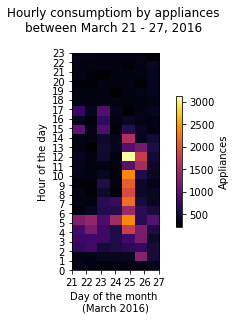

In [7]:
# Plot the heatmap

plt.imshow(pivot, cmap='inferno', aspect=0.65, extent=[21, 27, 0, 23])
plt.xlabel('Day of the month \n(March 2016)')
plt.ylabel('Hour of the day')
plt.title('Hourly consumptiom by appliances \nbetween March 21 - 27, 2016 \n')

cbar = plt.colorbar(shrink = .6)
cbar.set_label("Appliances")

plt.xticks(range(21, 28))
plt.yticks(range(0, 24))


plt.show()

In [8]:
week_gp[week_gp['Appliances'] > 2000]

,day,hour,Appliances
107,2016-03-25,11,3120
109,2016-03-25,13,2370
110,2016-03-25,14,2070
112,2016-03-25,16,2190
114,2016-03-25,18,2350


In [9]:
# 2.2.3. Plot the histogram of energy consumption of appliances.

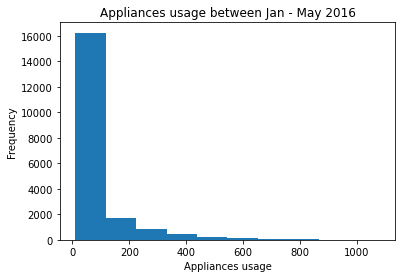

In [10]:
# Plot the histogram

plt.hist(energy_data['Appliances'])

plt.xlabel('Appliances usage')
plt.ylabel('Frequency')
plt.title('Appliances usage between Jan - May 2016')

plt.show()

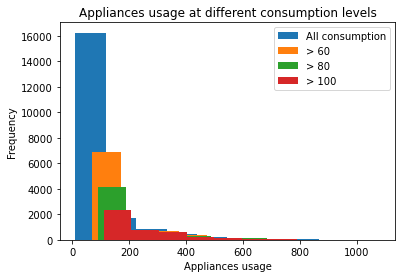

In [11]:
f_energy = energy_data[energy_data['Appliances'] > 60]
g_energy = energy_data[energy_data['Appliances'] > 80]
h_energy = energy_data[energy_data['Appliances'] > 100]

plt.hist(energy_data['Appliances'], label = 'All consumption')
plt.hist(f_energy['Appliances'], label = '> 60')
plt.hist(g_energy['Appliances'], label = '> 80')
plt.hist(h_energy['Appliances'], label = '> 100')

plt.legend()

plt.xlabel('Appliances usage')
plt.ylabel('Frequency')
plt.title('Appliances usage at different consumption levels')

plt.show()

In [ ]:
# 2.2.4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.

In [12]:
energy_data['Hour'] = energy_data['DATE'].dt.hour
energy_data['Min'] = energy_data['DATE'].dt.minute

energy_data['NSM'] = energy_data['Hour']*60*60 + energy_data['Min']*60


week['Hour'] = week['DATE'].dt.hour
week['Min'] = week['DATE'].dt.minute

week['NSM'] = week['Hour']*60*60 + week['Min']*60

energy_data.head()

/tmp/ipykernel_70666/893029591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week['Hour'] = week['DATE'].dt.hour
/tmp/ipykernel_70666/893029591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week['Min'] = week['DATE'].dt.minute
/tmp/ipykernel_70666/893029591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,DATE,Hour,Min,NSM
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,17,0,61200
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,17,10,61800
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,17,20,62400
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,17,30,63000
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,17,40,63600


In [ ]:
# Plot Appliances vs NSM

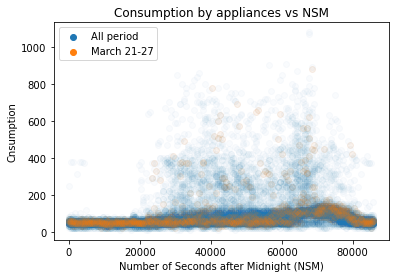

In [13]:
plt.scatter(x = 'NSM', y = 'Appliances', data = energy_data, alpha = 0.025, label = 'All period')
plt.scatter(x = 'NSM', y = 'Appliances', data = week, alpha = 0.07, label = 'March 21-27')

plt.xlabel('Number of Seconds after Midnight (NSM)')
plt.ylabel('Cnsumption')
plt.title('Consumption by appliances vs NSM')

legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_alpha(1)

plt.show()

In [ ]:
# 2.2.5 Plot appliances energy consumption vs. Press mm Hg

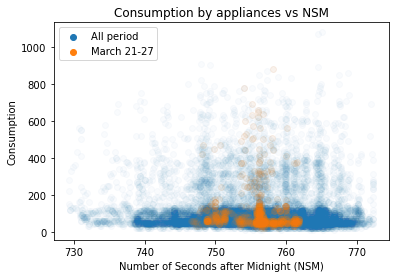

In [10]:
plt.scatter(x = 'Press_mm_hg', y = 'Appliances', data = energy_data, alpha = 0.025, label = 'All period')
plt.scatter(x = 'Press_mm_hg', y = 'Appliances', data = week, alpha = 0.07, label = 'March 21-27')

plt.xlabel('Number of Seconds after Midnight (NSM)')
plt.ylabel('Consumption')
plt.title('Consumption of appliances vs NSM')

legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_alpha(1)

plt.show()

In [ ]:
# 2.2.6. It is observed that the major contributing factors for the energy consumption
# among all other features is NSM and Press mm Hg. Comment on it.

Regarding to NSM, since it accounts for time after midnight, it is expected to see a significant increase 
in appliances usage around the meals time. Indeed, the higher jump in applicance usage is around the time in
which people usually have dinner.

As for the atmospheric pressure,drastic changes in the atmospheric pressure could represent an uncoming storm, meaning 
peoplr would be more likely to be at home, and then to use the appliances. 

Regarding to all the oher enviromental variables, most of them show a flat relationship with NSM, 
and can be quite independent from the presence/absence of people from home, and then with their appliances usage.  

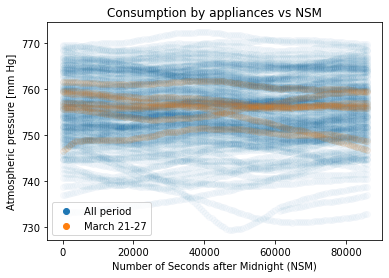

In [12]:
plt.scatter(x = 'NSM', y = 'Press_mm_hg', data = energy_data, alpha = 0.025, label = 'All period')
plt.scatter(x = 'NSM', y = 'Press_mm_hg', data = week, alpha = 0.07, label = 'March 21-27')

plt.xlabel('Number of Seconds after Midnight (NSM)')
plt.ylabel('Atmospheric pressure [mm Hg]')
plt.title('Atmospheric pressure vs Number of Seconds after Midnight')

legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_alpha(1)

plt.show()

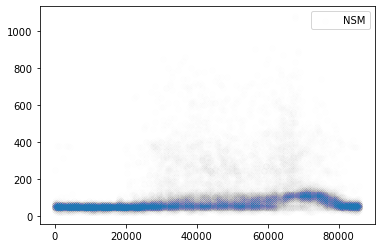

In [13]:
plt.scatter(x = 'NSM', y = 'Appliances', data = energy_data, alpha = 0.005, label = 'NSM')
plt.legend()

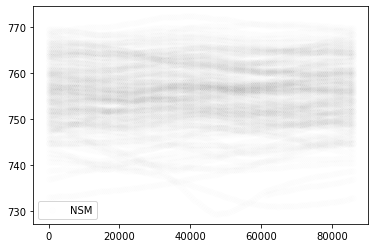

In [15]:
plt.scatter(x = 'NSM', y = 'Press_mm_hg', data = energy_data, alpha = 0.003, label = 'NSM')
plt.legend()

In [ ]:
# 2.3 Multi-variate

# Data: The NASA data set comprises different sizes of NACA 0012 airfoils at various wind tunnel speeds 
# and angles of attack. The span of the airfoil and the observer position were the same 
# in all of the experiments.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'

airfoils = pd.read_csv(url, sep = "\t", header = None)

airfoils.rename(columns={0: 'Frequency [Hz]', 1: 'Angle of attack', 2: 'Chord length [m]',
                        3: 'Free S. Vel [m s-1]', 4: 'SSD Thickness [m]', 5: 'Scaled sound pressure [dec]'}, 
                inplace=True)


airfoils.head()

,Frequency [Hz],Angle of attack,Chord length [m],Free S. Vel [m s-1],SSD Thickness [m],Scaled sound pressure [dec]
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [39]:
mean = airfoils.mean()
var = airfoils.var()
median = airfoils.median()
kurt = airfoils.kurtosis()
skew = airfoils.skew()

maxim = airfoils.max()
minim = airfoils.min()

data = {'Mean': mean,
       'Variance': var,
       'Median': median,
       'Kurtosis': kurt,
       'Skewness': skew,
       'Range': maxim-minim}

summary = pd.DataFrame(data)

summary

,Mean,Variance,Median,Kurtosis,Skewness,Range
Frequency [Hz],2886.380572,9.938717e+06,1600.000000,5.708685,2.137084,19800.000000
Angle of attack,6.782302,3.502424e+01,5.400000,-0.412951,0.689164,22.200000
Chord length [m],0.136548,8.749868e-03,0.101600,-1.037964,0.457457,0.279400
Free S. Vel [m s-1],50.860745,2.425116e+02,39.600000,-1.563951,0.235852,39.600000
SSD Thickness [m],0.011140,1.729287e-04,0.004957,2.218903,1.702165,0.058011
Scaled sound pressure [dec],124.835943,4.759146e+01,125.721000,-0.314187,-0.418952,37.607000
